In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline
np.seterr(all='warn')
mpl.rcParams['figure.dpi'] = 70

from functools import wraps
if not hasattr(plt, 'old_subplots'): plt.old_subplots = plt.subplots
@wraps(plt.old_subplots)
def my_subplots(*args, **kwargs):
    if not 'figsize' in kwargs and len(args) > 1:
        width = 5
        maxwidth = 15
        rows, cols, *_ = args
        w = min(maxwidth, width * cols)
        kwargs['figsize'] = (w, w / cols / 1.6 * rows)
    
    gridspec_kw = dict()
    if kwargs.get('sharex') == 'col':
        gridspec_kw['hspace'] = 0.1
    if kwargs.get('sharey') == 'row':
        gridspec_kw['wspace'] = 0.1
    if 'gridspec_kw' in kwargs:
        gridspec_kw.update(kwargs['gridspec_kw'])
    kwargs['gridspec_kw'] = gridspec_kw
    
    return plt.old_subplots(*args, **kwargs)
        
plt.subplots = my_subplots

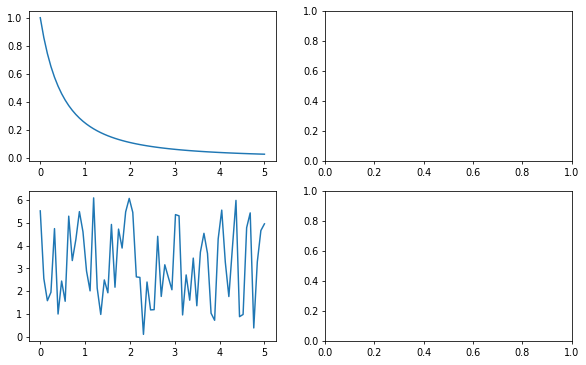

In [20]:
N = 128
alpha = 2

phases = 2*np.pi*np.random.rand(N//2)
q = np.linspace(0, 5, N//2)
amplitude = (1 + np.abs(q))**(-alpha)

f, axes = plt.subplots(2,2)
axes[0,0].plot(q, amplitude)
axes[1,0].plot(q, phases)

np.fft.irfft(, N)



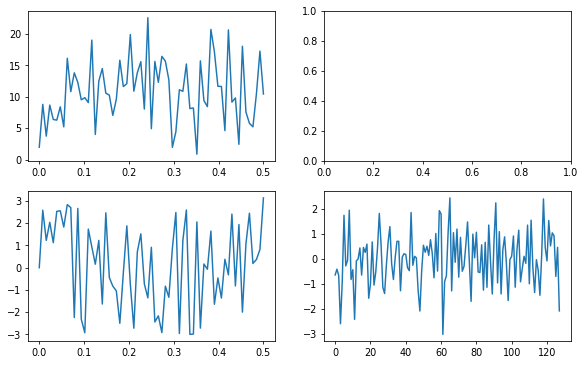

In [24]:
un = np.random.normal(loc = 0, scale = 1, size = N)
uq = np.fft.rfft(un)
q = np.fft.rfftfreq(N)

f, axes = plt.subplots(2,2)
axes[0,0].plot(q, np.abs(uq))
axes[1,0].plot(q, np.angle(uq))
axes[1,1].plot(un)

beta = (gamma - 1)/2



inf

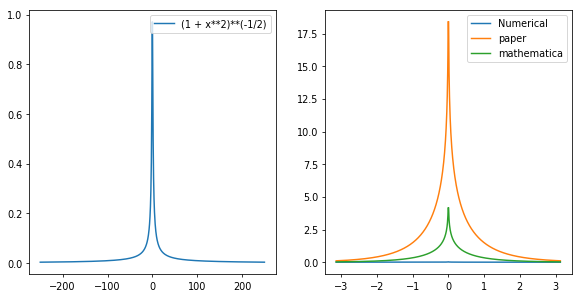

In [179]:
import scipy.special
def S(q, gamma):
    'Implements the fourier transform of (1 + q**2)**(gamma/2)'
    beta = (gamma - 1)/2
    q = np.abs(q)
    return -2**(1-beta/2) / scipy.special.gamma(beta/2) * (q)**beta * scipy.special.kv(beta, np.abs(q))

def S2(q, gamma):
    'Implements the fourier transform of (1 + q**2)**(gamma/2)'
    beta = (gamma - 1)/2
    q = np.abs(q)
    return 2*np.sqrt(np.pi) / scipy.special.gamma(beta + 1) * (q/2)**beta * scipy.special.kv(beta, q)

def S3(q, alpha):
    return 2**(1-alpha/2) * np.abs(q)**((alpha-1)/2) * scipy.special.kv(1/2 * (alpha-1),np.abs(q)) / scipy.special.gamma(alpha/2)

L = 500
x = np.linspace(-L/2,L/2,1000)
d = x[1] - x[0]

gamma = 1
p = (1 + x**2)**(-gamma/2)

f, axes = plt.subplots(1,2, figsize = (10,5))
axes[0].plot(x, p, label = f'(1 + x**2)**(-{gamma}/2)')

from scipy.fftpack import fft, ifft, fftfreq, fftshift

pq = fftshift(fft(p)) / len(x)
f = fftshift(fftfreq(len(pq), d = 1))
q = f * 2*np.pi

axes[1].plot(q, np.abs(pq), label = 'Numerical')
#axes[1].plot(q, S(q, gamma), label = 'wolframalpha')
axes[1].plot(q, S2(q, gamma), label = 'paper')
axes[1].plot(q, S3(q, gamma), label = 'mathematica')

#axes[1].set(ylim =(0,1), xlim = (-0.01,0.01))
for a in axes: a.legend()
S3(0, gamma)

(501,)
(501,) 1001 (10000, 1001) (10000, 501) (1001,) (501,)
[[-2.23291521  2.18021324 -2.19036833 ...  1.98280238 -1.99231798
   2.2005144 ]
 [ 0.37269267 -0.3668056   0.4315616  ... -0.58141184  0.37760144
  -0.45735629]
 [ 0.48543421 -0.4416165   0.62485036 ... -0.82671685  0.6726735
  -0.59744078]
 ...
 [-0.25896194  0.20690924 -0.23311022 ...  0.67392431 -0.52866339
   0.4584174 ]
 [ 0.65388026 -0.73323988  0.73760376 ... -0.93251368  0.90696138
  -0.65860771]
 [ 0.43388677 -0.64570792  0.43782338 ... -0.39254129  0.38807471
  -0.43009774]]
mean(noise) = -1.1598413092210517e-05
std(noise) = 0.9983030130900603
mean(binary) = -1.1598413092210517e-05
std(binary) = 0.9983030130900603


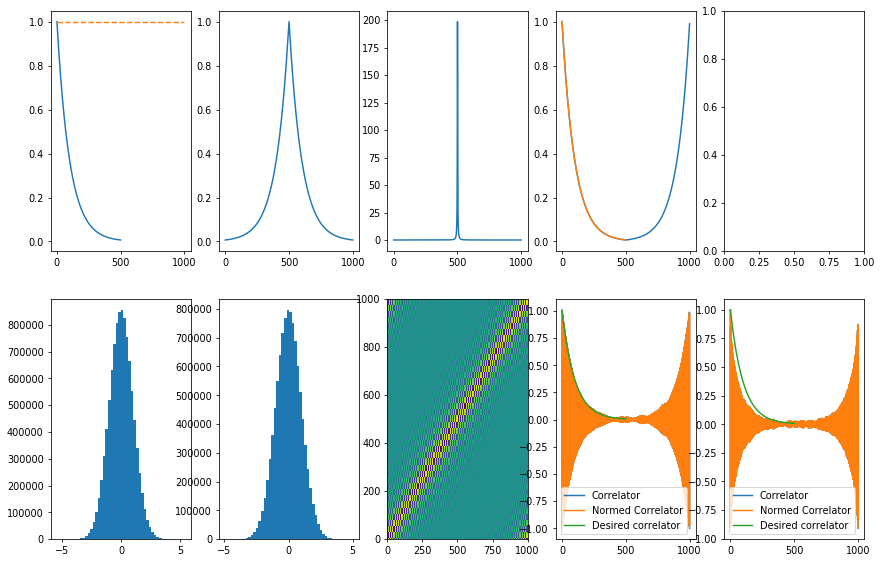

In [471]:
from numpy.fft import rfft, irfft, rfftfreq, hfft, ihfft

def correlated_noise(correlation_function, replications):
    'Generate noise whose two point correlator looks like correlation_function (which is real symmetric and only the positive half is supplied)'
    N = len(correlation_function)*2 - 1
    #U = np.random.rand(*(replications, N))
    U = np.random.normal(size = (replications, N), scale = 1, loc = 0)
    #U = np.random.choice([-1,1], size = (replications, N))
    Uq = rfft(U) #output is hermitian because U is real
    
    #use hfft which assumes the input is hermitian (ie symmetric in this case)
    #it returns a symmetric answer, ordered in the fft way, and then take on the positive frequency part of that
    Sq = hfft(correlation_function)[:Uq.shape[-1]]
    
    print(correlation_function.shape, N, U.shape,Uq.shape, corr.shape, Sq.shape)
    
    Nq = np.sqrt(Sq) * Uq
    
    correlated_noise = irfft(Nq)
    return correlated_noise, U, Uq, Sq, Nq

M = int(1e4) # average over this many replications
L = 1001 # system size
x = np.arange(0,L//2 + 1,1)
print(x.shape)

gamma = 0.2
p = 5 * (1 + x**2)**(-gamma/2)
p = np.exp(-x/100)


f, rows = plt.subplots(2,5, figsize = (15,10))

axes = rows[0]

corr = np.concatenate([p[-2::-1], p])
Sq = hfft(p)

axes[0].plot(x, p)
axes[0].plot((0,L), (1,1), '--')

axes[1].plot(corr)

axes[2].plot(fftshift(Sq))

axes[3].plot(irfft(Sq[:L//2 + 1]))
axes[3].plot(p)

power_law_noise, U, Uq, Sq, Nq = correlated_noise(p, replications = M)
alternating = 2*(np.arange(power_law_noise.shape[-1]) % 2) - 1
power_law_noise = power_law_noise * alternating

print(power_law_noise)
print(f'mean(noise) = {power_law_noise.mean()}')
print(f'std(noise) = {power_law_noise.std()}')

C = np.cov(power_law_noise, rowvar = False)
R = np.corrcoef(power_law_noise, rowvar = False)

axes = rows[1]
axes[0].hist(U.flatten(), bins = 50)
axes[1].hist(power_law_noise.flatten(), bins = 50)

axes[2].pcolormesh(C.T)

axes[3].plot(C[0, : ], label = 'Correlator')
axes[3].plot(R[0, : ], label = 'Normed Correlator')
axes[3].plot(p[:], label = 'Desired correlator')


binary = 2*(power_law_noise > 0) - 1
print(f'mean(binary) = {power_law_noise.mean()}')
print(f'std(binary) = {power_law_noise.std()}')

C = np.cov(binary, rowvar = False)
R = np.corrcoef(binary, rowvar = False)


axes[4].plot(C[0, : ], label = 'Correlator')
axes[4].plot(R[0, : ], label = 'Normed Correlator')
axes[4].plot(p
                 [:], label = 'Desired correlator')

axes[3].legend()
axes[4].legend()

In [328]:
M = int(1e5) # average over this many replications
L = 1000 # system size
N = 1001 #number of points
x = np.linspace(-L/2,L/2,N)
d = x[1] - x[0]

gamma = 0.6
p = (1 + x**2)**(-gamma/2)
pq = rfft(p)


u = np.random.normal(size
                     = N)
uq = rfft(u)
print(pq.shape)

p2 = irfft(uq * np.sqrt(pq), n = N)


R = np.corrcoef(p2, rowvar = False)


f, ax = plt.subplots(figsize = (10,5))

ax.plot(R[N//2, N//2: ] * 10, label = 'Measured correlator');
ax.loglog(p[N//2:] * 24, label = 'Desired correlator')

ax.legend()